<a href="https://colab.research.google.com/github/zassimouse/ADS2022-09-02/blob/master/mmo_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow


## Задание 1

Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность

In [ ]:
import tensorflow as tf
import numpy as np
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist

(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [ ]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

Давайте посмотрим структуры полученного массива данных:

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
len(y_train_labels)

60000

In [ ]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
len(y_test_labels)

10000

In [ ]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

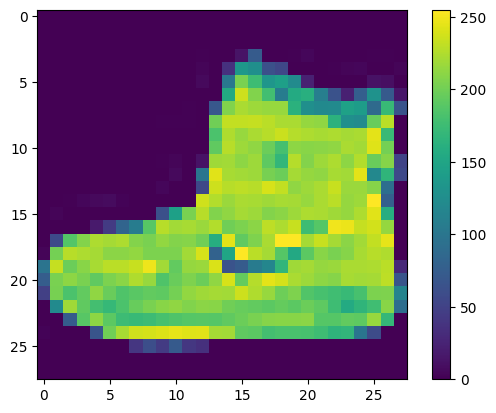

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Посмотрим первые 25 изображений:

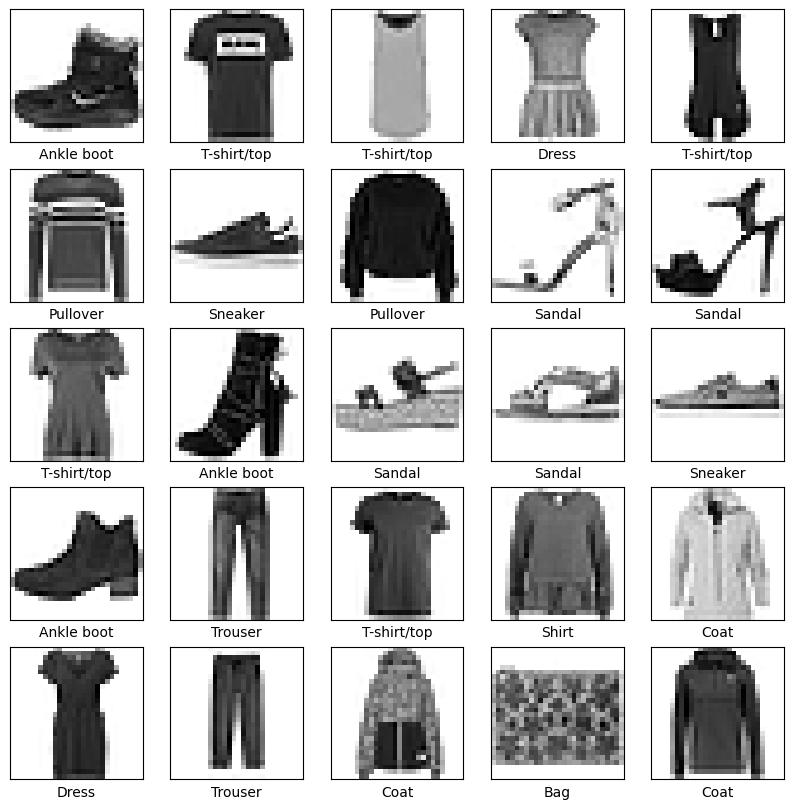

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_labels[i]])
plt.show()

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#model = Sequential([
#    Flatten(input_shape=(28, 28)),
#    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
#    Dropout(0.5),
#    Dense(10, activation='relu')
#])

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(80, activation='relu', kernel_regularizer=l2(0.01)),  # L2-регуляризация для уменьшения переобучения
    Dropout(0.1), # Слой Dropout для предотвращения переобучения (выключаем 10% нейронов)
    Dense(40, activation='relu', kernel_regularizer=l2(0.01)),  # L2-регуляризация для уменьшения переобучения
    Dropout(0.2), # Слой Dropout для предотвращения переобучения (выключаем 20% нейронов)
    Dense(20, activation='relu', kernel_regularizer=l2(0.01)),  # L2-регуляризация для уменьшения переобучения
    Dropout(0.4), # Слой Dropout для предотвращения переобучения (выключаем 30% нейронов)
    Dense(10, activation='relu')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 80)                  │          62,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 40)                  │           3,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,070 (261.99 KB)

 Trainable params: 67,070 (261.99 KB)

 Non-trainable params: 0 (0.00 B)

Давайте вспомним ключевые понятия, которые нам понадобятся при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [ ]:
model.fit(X_train, y_train,
          epochs=5,
          batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.3973 - loss: 2.9844 - val_accuracy: 0.7699 - val_loss: 1.1993
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6770 - loss: 1.3791 - val_accuracy: 0.7955 - val_loss: 0.9709
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7090 - loss: 1.1878 - val_accuracy: 0.7708 - val_loss: 0.9262
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7254 - loss: 1.1047 - val_accuracy: 0.7892 - val_loss: 0.8852
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7323 - loss: 1.0653 - val_accuracy: 0.7900 - val_loss: 0.8563


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.7900 - loss: 0.8563

Test accuracy: 0.7900000214576721


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых данных и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

На данный момент наша модель отвечает линейно:

In [ ]:
model.predict(X_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        2.869282  , 0.        , 3.838805  , 0.35803562, 4.8068957 ]],
      dtype=float32)

In [ ]:
y_test[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Команды ниже позволяют проверить работу натренированной ранее нейросети.

In [ ]:
probability_model = Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [ ]:
predictions = probability_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
predictions[0]

array([0.00515794, 0.00515794, 0.00515794, 0.00515794, 0.00515794,
       0.0909053 , 0.00515794, 0.23968883, 0.00737851, 0.63107973],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
y_test_labels[0]

9

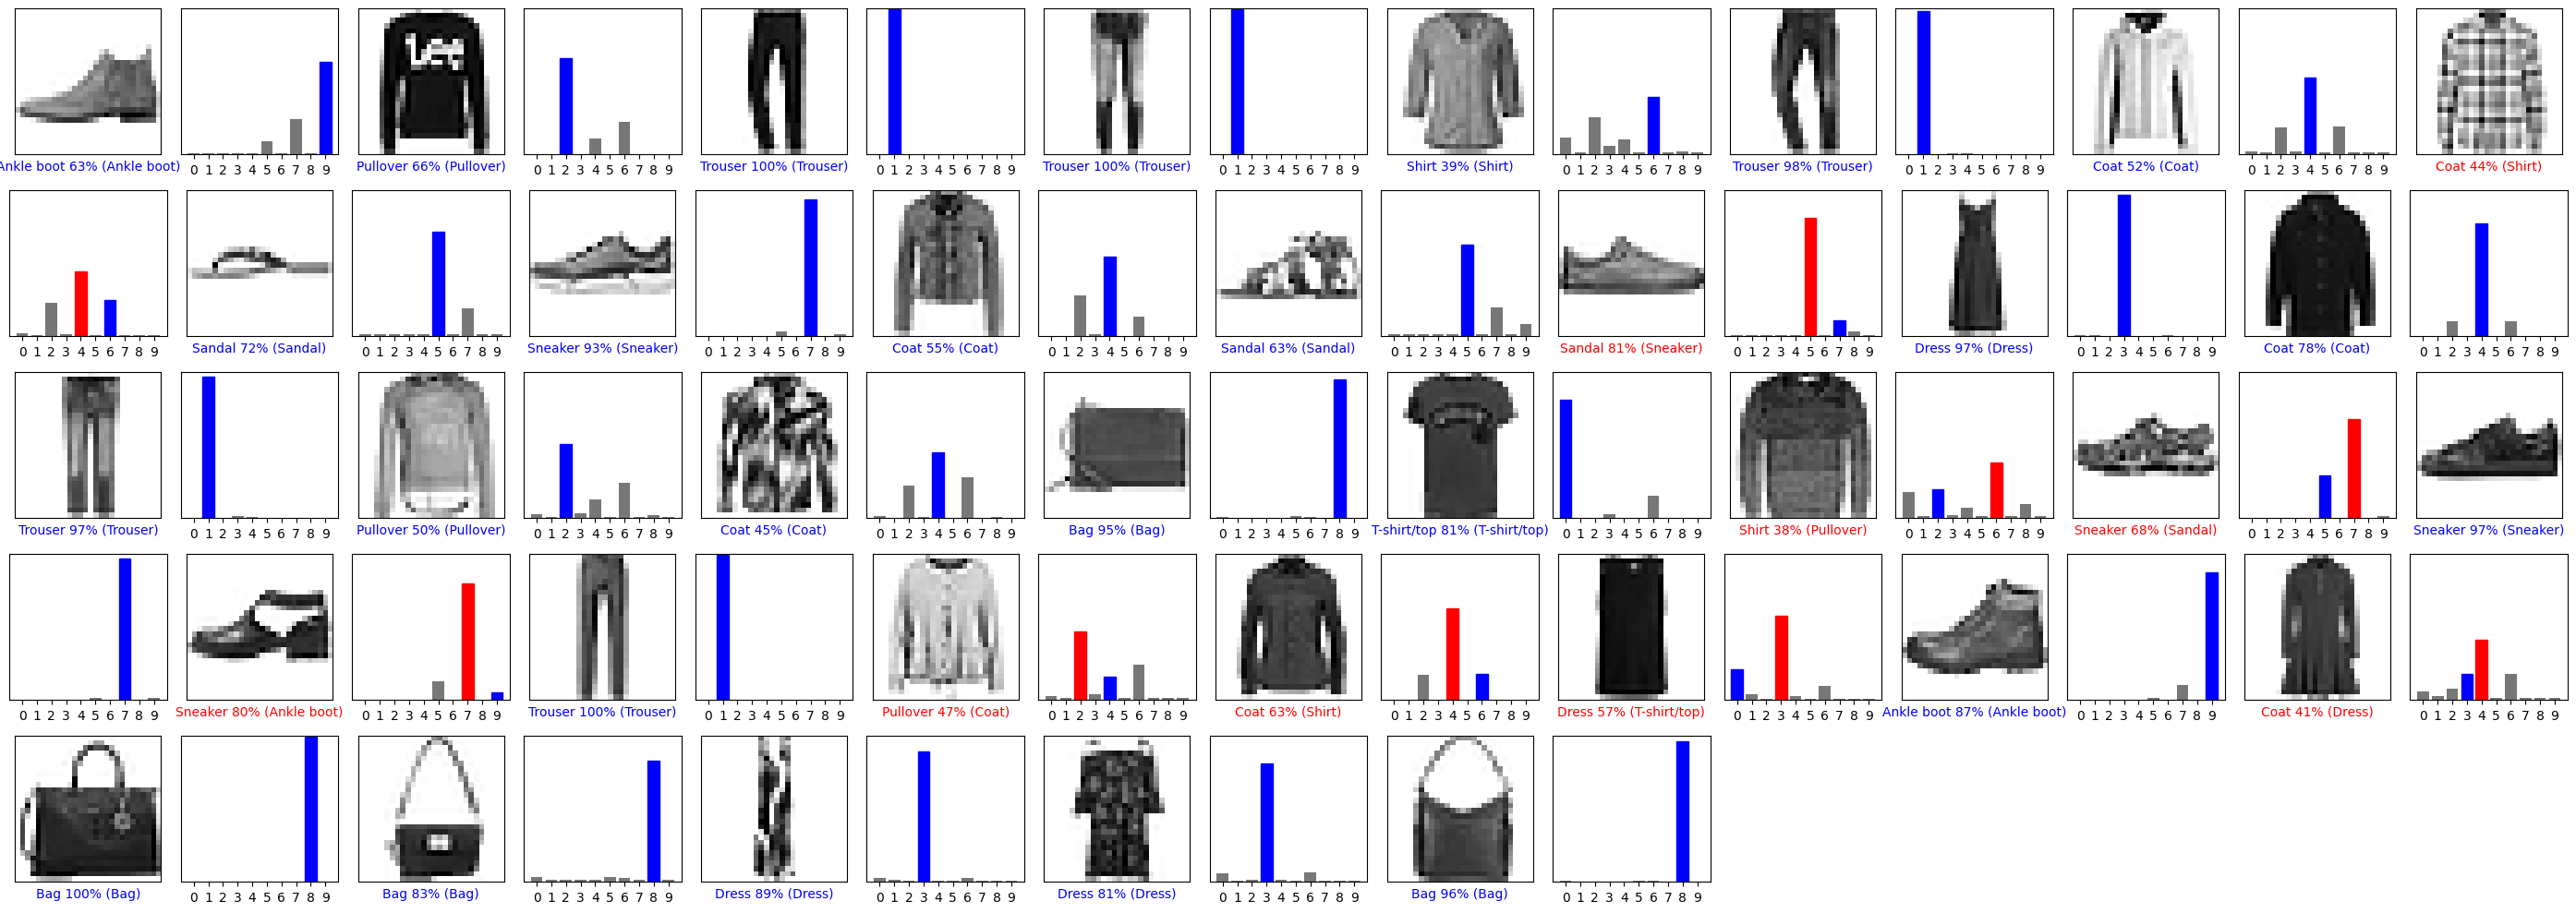

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


num_rows = 5
num_cols = 7
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols + 1, 2 * i + 1)
    plot_image(i, predictions, y_test_labels, X_test)
    plt.subplot(num_rows, 2 * num_cols + 1, 2 * i + 2)
    plot_value_array(i, predictions, y_test_labels)


    if i < num_images - 1:
        plt.subplot(num_rows, 2 * num_cols + 1, 2 * i + 3)


plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

## Задание 2

Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке

In [ ]:
import tensorflow as tf

# Создание тензора с константой
constant_tensor = tf.constant([[1, 2], [3, 4]])
print(constant_tensor)

# Создание переменной
variable_tensor = tf.Variable(tf.random.normal([2, 2]))
print(variable_tensor)

# Тензор, заполненный нулями
zero_tensor = tf.zeros(shape=(2, 2))
print(zero_tensor)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.09819897,  0.47470033],
       [ 0.9761132 ,  0.71947944]], dtype=float32)>
tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


In [ ]:
import tensorflow as tf

# Получаем список доступных GPU
gpus = tf.config.list_physical_devices('GPU')

# Выводим информацию о доступных GPU
print("Доступные GPU:", gpus)

Доступные GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Задание 3

Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GlobalAveragePooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

In [ ]:
max_words = 10000
max_len = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (25000, 200)
Shape of y_train: (25000,)


In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

model = Sequential([
    Embedding(max_words, 128),
    LSTM(128, return_sequences=True),
    GlobalAveragePooling1D(),
    Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train,
          epochs=5,
          batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:593: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.4927 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4998 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5042 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5090 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4990 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


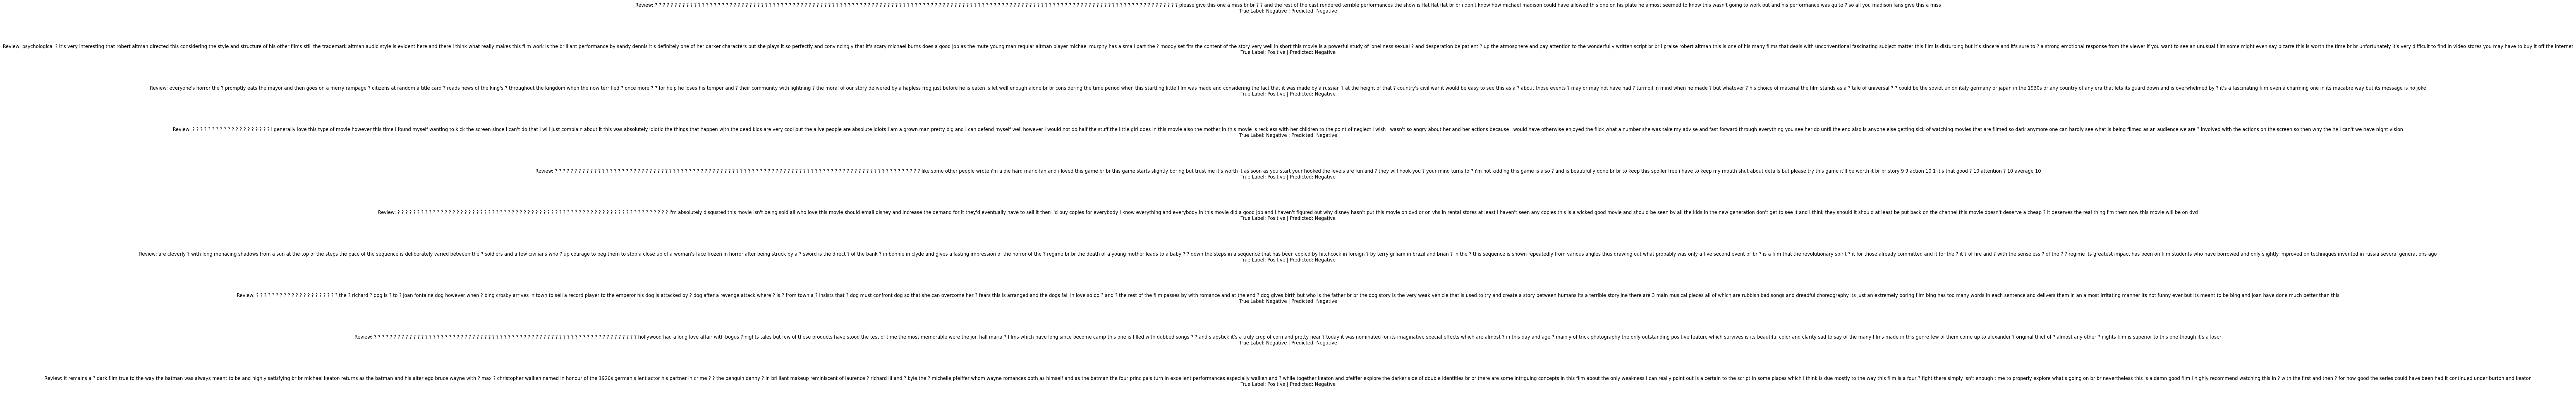

In [ ]:
predictions = model.predict(X_test)

# преобр вероятности в бинарные метки (0 или 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()


def display_predictions(reviews, true_labels, predicted_labels, num_examples=10):
    plt.figure(figsize=(10, num_examples * 1.5))

    # Получение словаря индексов слов
    word_index = imdb.get_word_index()

    # Создание обратного словаря для преобразования индексов обратно в слова
    reverse_word_index = {value + 3: key for key, value in word_index.items()}

    for i in range(num_examples):
        plt.subplot(num_examples, 1, i + 1)  # Создание подграфика для каждого примера

        # Декодирование отзыва из индексов в текст
        review_text = " ".join([reverse_word_index.get(word_id, "?") for word_id in reviews[i]])

        plt.title(f"Review: {review_text}\nTrue Label: {'Positive' if true_labels[i] == 1 else 'Negative'} | Predicted: {'Positive' if predicted_labels[i] == 1 else 'Negative'}")

        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_predictions(X_test, y_test, predicted_classes, num_examples=10)


#CNN

## Задание 1

Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает

Давайте теперь попробуем сделать несколько усложненный вариант нейронной сети разобранной ранее. В ней будет на несколько слоев больше и в ней будет использоваться data augumentation, процедура позволяющая за счет искажений изображений увеличить количество тренировочных данных, а как мы знаем чем больше тренировочных данных тем лучше будет работать нейросеть. Для обучения нейросети будем использовать датасет cifar-10. В нем 10 категорий объектов, например - лошадь, лягушка, корабль. Данный датасет уже более сложен для нейронных сетей чем mnist, однако он намного проще датасетов наподобие imagenet где используются сотни классов и архитектуры нейронных сетей для подобных датасетов также понадобяться более сложные.

In [ ]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import os

# установка параметров нейросети
batch_size = 512
num_classes = 10
epochs = 5
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


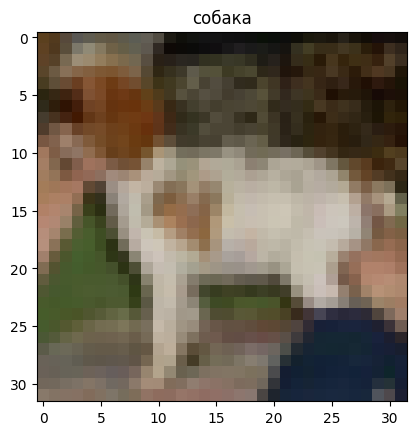

In [ ]:
N = 12

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [ ]:
model = Sequential()  # Создаем последовательную модель

model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))  # Первый сверточный слой с 32 фильтрами размером 3x3 и паддингом 'same'
model.add(BatchNormalization())  # Нормализация выходов предыдущего слоя для ускорения обучения и улучшения стабильности
model.add(Activation('relu'))  # Применение функции активации ReLU для добавления нелинейности
model.add(Conv2D(32, (3, 3)))  # Второй сверточный слой с 32 фильтрами размером 3x3 без паддинга
model.add(BatchNormalization())  # Нормализация выходов второго сверточного слоя
model.add(Activation('relu'))  # Применение функции активации ReLU для второго сверточного слоя
model.add(MaxPooling2D(pool_size=(2, 2)))  # Операция максимального пулинга с окном 2x2 для уменьшения размерности
model.add(Dropout(0.25))  # Слой Dropout: отключает 25% нейронов во время обучения для предотвращения переобучения

model.add(Conv2D(64, (3, 3), padding='same'))  # Третий сверточный слой с 64 фильтрами размером 3x3 и паддингом 'same'
model.add(BatchNormalization())  # Нормализация выходов третьего сверточного слоя
model.add(Activation('relu'))  # Применение функции активации ReLU для третьего сверточного слоя
model.add(Conv2D(64, (3, 3)))  # Четвертый сверточный слой с 64 фильтрами размером 3x3 без паддинга
model.add(BatchNormalization())  # Нормализация выходов четвертого сверточного слоя
model.add(Activation('relu'))  # Применение функции активации ReLU для четвертого сверточного слоя
model.add(MaxPooling2D(pool_size=(2, 2)))  # Операция максимального пулинга с окном 2x2 для уменьшения размерности
model.add(Dropout(0.25))  # Слой Dropout: отключает еще 25% нейронов во время обучения для предотвращения переобучения

model.add(Flatten())  # Преобразуем многомерные данные в одномерный вектор для передачи в полносвязные слои
model.add(Dense(512))  # Полносвязный слой с 512 нейронами
model.add(Activation('relu'))  # Применение функции активации ReLU к выходам полносвязного слоя
model.add(Dropout(0.5))  # Слой Dropout: отключает 50% нейронов во время обучения для предотвращения переобучения на уровне полносвязного слоя
model.add(Dense(num_classes))  # Выходной полносвязный слой с количеством нейронов, равным количеству классов (num_classes)
model.add(Activation('softmax'))  # Применение функции активации softmax к выходам последнего слоя для получения вероятностей принадлежности к каждому классу

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_36 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_37 (Activation)           │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_38 (Activation)           │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_39 (Activation)           │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_40 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,251,626 (4.77 MB)

 Trainable params: 1,251,242 (4.77 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
data_augmentation = False

In [ ]:
if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.2,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)


    train_gen = datagen.flow(X_train,
                             y_train,
                             batch_size=batch_size)

    # запуск data augmentation через fit_generator
    model.fit(train_gen,
              epochs=epochs,
              validation_data=(X_test, y_test))

Не используется data augmentation
Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.1734 - loss: 2.7093 - val_accuracy: 0.1000 - val_loss: 2.3711
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.2890 - loss: 1.9285 - val_accuracy: 0.1011 - val_loss: 2.5791
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3386 - loss: 1.7737 - val_accuracy: 0.1214 - val_loss: 2.5512
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.3780 - loss: 1.6743 - val_accuracy: 0.2237 - val_loss: 2.0386
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3976 - loss: 1.6150 - val_accuracy: 0.3355 - val_loss: 1.7436


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy Model 1:', test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.3355 - loss: 1.7436

Test accuracy Model 1: 0.33550000190734863


## Задание 2
Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET

1. Изменение входного слоя
- MNIST: Изображения имеют размер 28x28 пикселей и одноцветные (оттенки серого). Входной слой должен принимать тензор с формой (28, 28, 1).
- CIFAR-100: Изображения имеют размер 32x32 пикселя и цветные (RGB). Входной слой должен принимать тензор с формой (32, 32, 3).
- ImageNet: Изображения имеют размер 224x224 пикселя и цветные (RGB). Входной слой должен принимать тензор с формой (224, 224, 3).
2. Изменение архитектуры сети
- MNIST: Можно использовать простую полносвязную сеть или небольшую сверточную сеть, так как изображения простые и имеют низкое разрешение.
- CIFAR-100: Поскольку изображения более сложные и содержат больше классов (100), потребуется более глубокая сверточная сеть с большим количеством слоев и фильтров.
- ImageNet: Для работы с ImageNet обычно используются более сложные архитектуры, такие как ResNet или Inception. Они содержат множество сверточных слоев и механизмов для обработки больших объемов данных.


Upd. ReLU требует меньше вычислительных ресурсов по сравнению с другими функциями активации, такими как сигмоида или Tanh, так как она включает простые операции сравнения и присвоения, а не вычисления экспоненты